In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [274]:
plotly.tools.set_credentials_file(username='ShuyuanZhao', api_key='QlHttzgXOdXCz2U1EbOD')

In [222]:
def checking_missing(df,Filter):
    """
    check and filter the missing value for each varible in DataFrame
    : type df: pandas.core.frame.DataFrame
    : type Filter: int or boolean
    : rtype: dictionary
    """
    missing_count = {}
    for column in df:
        missing_num = sum(df[column].isnull())
        if missing_num == 0:
            pass           
        elif not Filter:
            missing_count[column] = missing_num
            print('The number of missing value for',column,'is:',missing_num,',','{0:.2f}'.format(missing_num/df.shape[0]*100),'%')
        elif missing_num/df.shape[0]*100 > Filter: 
            missing_count[column] = missing_num
            print('The number of missing value for',column,'is:',missing_num,',','{0:.2f}'.format(missing_num/df.shape[0]*100),'%')
    if not missing_count:
        print('There is no missing value...')
    return missing_count



In [ ]:
def correlation_analysis(target, source):
    matrix_hold = []
    for i in source:
        hold = []
        for j in target:
            hold.append(df[i].corr(df[j]))
        matrix_hold.append(hold)
    correlation_matrix = np.asarray(matrix_hold)
    sns.heatmap(correlation_matrix, xticklabels=target, yticklabels=source)
    plt.title('feature correlations')
    return correlation_matrix

In [311]:
def series_to_freq(series):
    counter=collections.Counter(series)
    freq_table = pd.DataFrame(list(counter.items()),columns=['category', 'frequence'])
    return freq_table

# Load dataset

In [2]:
print('Loading data...')
df = pd.read_csv("./data_train.csv")
print('Data is loaded')
print('The shape of data_train is:',df.shape)
print("Summary of the basic information about this DataFrame and its data:")
print(df.info())

In [74]:
df.head(3)

# Exploring training data

In [139]:
# df.columns

In [103]:
CM_columns = []
DXCCS_columns = []
PRCCS_columns = []
PRDAY_columns = []
HOSP_columns = []
other_columns = []
for col in df.columns:
    if re.match('^CM',col):
        CM_columns.append(col)
    elif re.match('^DXCCS',col):
        DXCCS_columns.append(col)
    elif re.match('^PRCCS',col):
        PRCCS_columns.append(col)
    elif re.match('^PRDAY',col):
        PRDAY_columns.append(col)
    elif re.match('^HOSP',col):
        HOSP_columns.append(col)
    else:
        other_columns.append(col)

## Target variables

In [306]:
# ASOURCE
freq_table = series_to_freq(df['ASOURCE'])
trace = go.Pie(labels=freq_table.iloc[:,0], values=freq_table.iloc[:,1])
py.iplot([trace], filename='basic_pie_chart')

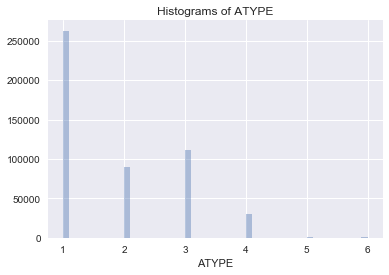

In [170]:
sns.distplot(df['ATYPE'],kde=False)
plt.title('Histograms of ATYPE')

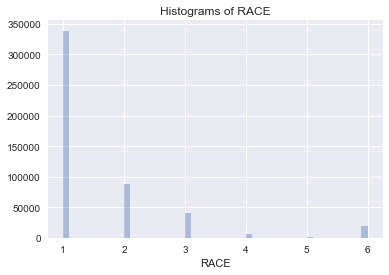

In [171]:
sns.distplot(df['RACE'],kde=False)
plt.title('Histograms of RACE')

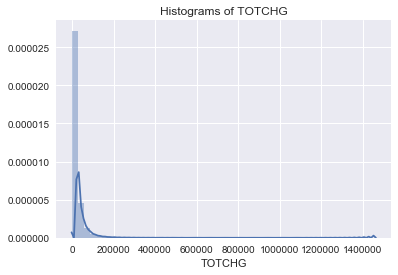

In [173]:
sns.distplot(df['TOTCHG'],kde=True)
plt.title('Histograms of TOTCHG')

In [314]:
# ZIPINC_QRTL
freq_table = series_to_freq(df['ZIPINC_QRTL'])
trace = go.Pie(labels=freq_table.iloc[:,0], values=freq_table.iloc[:,1])
py.iplot([trace], filename='basic_pie_chart')

## other_columns

In [138]:
sub_others = df.loc[:,other_columns]
print('Listing other columns...')
print(other_columns)
print('The shape of the subset is:',sub_others.shape)

Listing other columns...
['AGE', 'AMONTH', 'ASOURCE', 'ATYPE', 'AWEEKEND', 'DIED', 'DISCWT', 'DISPUNIFORM', 'DQTR', 'FEMALE', 'KEY', 'LOS', 'MDC', 'NDX', 'NIS_STRATUM', 'NPR', 'ORPROC', 'PAY1', 'RACE', 'TOTCHG', 'ZIPINC_QRTL', 'TOTAL_DISC']
The shape of the subset is: (494932, 22)


In [130]:
# checking missing values
missing_others = checking_missing(sub_others,False)

The missing for AGE is: 34 , 0.01 %
The missing for AMONTH is: 2 , 0.00 %
The missing for AWEEKEND is: 2 , 0.00 %
The missing for DIED is: 536 , 0.11 %
The missing for DISPUNIFORM is: 536 , 0.11 %
The missing for FEMALE is: 14 , 0.00 %
The missing for LOS is: 14 , 0.00 %
The missing for PAY1 is: 203 , 0.04 %


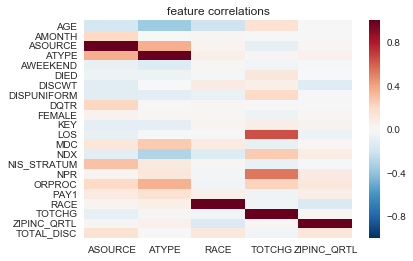

In [162]:
# print the heatmap of feature correlations
target = ['ASOURCE','ATYPE','RACE','TOTCHG','ZIPINC_QRTL']
source = other_columns
other_columns_correlation = correlation_analysis(target, source)

## PRDAY_columns

In [176]:
sub_prday = df.loc[:,PRDAY_columns]
print('Listing prday columns...')
print(PRDAY_columns)
print('The shape of the subset is:',sub_prday.shape)

Listing prday columns...
['PRDAY1', 'PRDAY2', 'PRDAY3', 'PRDAY4', 'PRDAY5', 'PRDAY6', 'PRDAY7', 'PRDAY8', 'PRDAY9', 'PRDAY10', 'PRDAY11', 'PRDAY12', 'PRDAY13', 'PRDAY14', 'PRDAY15']
The shape of the subset is: (494932, 15)


In [177]:
# checking missing values
missing_prday = checking_missing(sub_prday,False)

The missing for PRDAY1 is: 196285 , 39.66 %
The missing for PRDAY2 is: 322902 , 65.24 %
The missing for PRDAY3 is: 394795 , 79.77 %
The missing for PRDAY4 is: 432454 , 87.38 %
The missing for PRDAY5 is: 453270 , 91.58 %
The missing for PRDAY6 is: 466802 , 94.32 %
The missing for PRDAY7 is: 478445 , 96.67 %
The missing for PRDAY8 is: 484064 , 97.80 %
The missing for PRDAY9 is: 487770 , 98.55 %
The missing for PRDAY10 is: 489878 , 98.98 %
The missing for PRDAY11 is: 491303 , 99.27 %
The missing for PRDAY12 is: 492670 , 99.54 %
The missing for PRDAY13 is: 493213 , 99.65 %
The missing for PRDAY14 is: 493614 , 99.73 %
The missing for PRDAY15 is: 493959 , 99.80 %


In [197]:
sub_prday.describe()

,PRDAY1,PRDAY2,PRDAY3,PRDAY4,PRDAY5,PRDAY6,PRDAY7,PRDAY8,PRDAY9,PRDAY10,PRDAY11,PRDAY12,PRDAY13,PRDAY14,PRDAY15
count,298647.000000,172030.000000,100137.000000,62478.000000,41662.000000,28130.000000,16487.00000,10868.000000,7162.000000,5054.000000,3629.000000,2262.000000,1719.000000,1318.000000,973.000000
mean,1.189294,1.540202,1.905719,2.299465,2.647401,3.059332,3.86644,4.423261,5.262217,6.161654,7.048774,6.935897,7.806283,9.257208,9.538541
std,3.077806,3.794981,4.653839,5.451938,6.088871,6.717660,8.35476,8.757896,9.747901,11.105141,11.855506,11.655753,13.346473,14.432147,14.091478
min,-4.000000,-4.000000,-4.000000,-4.000000,-3.000000,-3.000000,-3.00000,-3.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,4.000000,4.000000
75%,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.00000,5.000000,7.000000,8.000000,9.000000,9.000000,10.000000,12.000000,13.000000
max,223.000000,159.000000,246.000000,162.000000,164.000000,157.000000,176.00000,236.000000,248.000000,248.000000,248.000000,248.000000,251.000000,160.000000,97.000000


/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


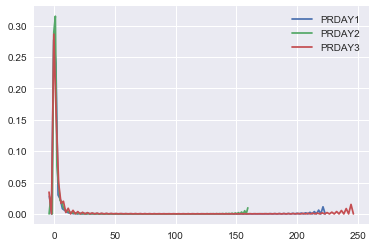

In [185]:
sns.kdeplot(df[PRDAY_columns[0]],label = 'PRDAY1')
sns.kdeplot(df[PRDAY_columns[1]],label = 'PRDAY2')
sns.kdeplot(df[PRDAY_columns[2]],label = 'PRDAY3')
plt.legend();

In [187]:
sub_prday.head(10)

,PRDAY1,PRDAY2,PRDAY3,PRDAY4,PRDAY5,PRDAY6,PRDAY7,PRDAY8,PRDAY9,PRDAY10,PRDAY11,PRDAY12,PRDAY13,PRDAY14,PRDAY15
0,37.0,37.0,37.0,37.0,1.0,29.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,4.0,0.0,2.0,3.0,3.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,14.0,29.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,6.0,19.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,1.0,8.0,8.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,36.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13.0,13.0,22.0,22.0,22.0,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,5.0,3.0,3.0,29.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


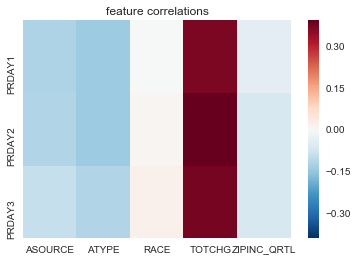

In [188]:
# print the heatmap of feature correlations
target = ['ASOURCE','ATYPE','RACE','TOTCHG','ZIPINC_QRTL']
source = PRDAY_columns[:3]
PRDAY_columns_correlation = correlation_analysis(target, source)

## HOSP_columns

In [199]:
sub_hosp = df.loc[:,HOSP_columns]
print('Listing HOSP columns...')
print(HOSP_columns)
print('The shape of the subset is:',sub_hosp.shape)
# checking missing values
missing_hosp = checking_missing(sub_hosp,False)

Listing HOSP columns...
['HOSPID', 'HOSP_BEDSIZE', 'HOSP_CONTROL', 'HOSP_LOCTEACH', 'HOSP_REGION']
The shape of the subset is: (494932, 5)
The number of missing value for HOSP_BEDSIZE is: 714 , 0.14 %
The number of missing value for HOSP_CONTROL is: 714 , 0.14 %
The number of missing value for HOSP_LOCTEACH is: 714 , 0.14 %


In [202]:
sub_hosp.head(10)

,HOSPID,HOSP_BEDSIZE,HOSP_CONTROL,HOSP_LOCTEACH,HOSP_REGION
0,5021,1.0,3.0,2.0,3
1,5021,1.0,3.0,2.0,3
2,5021,1.0,3.0,2.0,3
3,5021,1.0,3.0,2.0,3
4,5021,1.0,3.0,2.0,3
5,5021,1.0,3.0,2.0,3
6,5021,1.0,3.0,2.0,3
7,5021,1.0,3.0,2.0,3
8,5021,1.0,3.0,2.0,3
9,5021,1.0,3.0,2.0,3


## DXCCS_columns

In [224]:
sub_dxccs = df.loc[:,DXCCS_columns]
print('Listing DXCCS columns...')
print(DXCCS_columns)
print('The shape of the subset is:',sub_dxccs.shape)
# checking missing values
missing_dxccs = checking_missing(sub_dxccs,False)

Listing DXCCS columns...
['DXCCS1', 'DXCCS2', 'DXCCS3', 'DXCCS4', 'DXCCS5', 'DXCCS6', 'DXCCS7', 'DXCCS8', 'DXCCS9', 'DXCCS10', 'DXCCS11', 'DXCCS12', 'DXCCS13', 'DXCCS14', 'DXCCS15', 'DXCCS16', 'DXCCS17', 'DXCCS18', 'DXCCS19', 'DXCCS20', 'DXCCS21', 'DXCCS22', 'DXCCS23', 'DXCCS24', 'DXCCS25']
The shape of the subset is: (494932, 25)
The number of missing value for DXCCS1 is: 318 , 0.06 %
The number of missing value for DXCCS2 is: 18051 , 3.65 %
The number of missing value for DXCCS3 is: 51085 , 10.32 %
The number of missing value for DXCCS4 is: 86881 , 17.55 %
The number of missing value for DXCCS5 is: 124870 , 25.23 %
The number of missing value for DXCCS6 is: 162554 , 32.84 %
The number of missing value for DXCCS7 is: 199561 , 40.32 %
The number of missing value for DXCCS8 is: 237881 , 48.06 %
The number of missing value for DXCCS9 is: 278672 , 56.31 %
The number of missing value for DXCCS10 is: 311821 , 63.00 %
The number of missing value for DXCCS11 is: 337145 , 68.12 %
The number of

/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


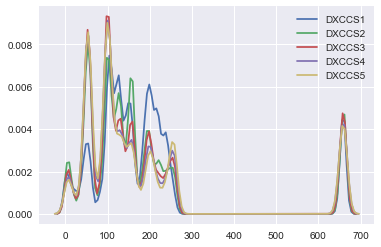

In [210]:
sns.kdeplot(df[DXCCS_columns[0]],label = 'DXCCS1')
sns.kdeplot(df[DXCCS_columns[1]],label = 'DXCCS2')
sns.kdeplot(df[DXCCS_columns[2]],label = 'DXCCS3')
sns.kdeplot(df[DXCCS_columns[3]],label = 'DXCCS4')
sns.kdeplot(df[DXCCS_columns[4]],label = 'DXCCS5')
plt.legend();

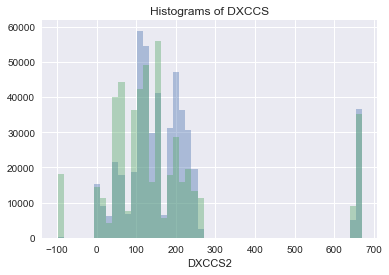

In [246]:
check_sub_dxccs = df.loc[:,DXCCS_columns].fillna(-99)
sns.distplot(check_sub_dxccs[DXCCS_columns[0]],kde=False,label = 'DXCCS1')
sns.distplot(check_sub_dxccs[DXCCS_columns[1]],kde=False,label = 'DXCCS2')
plt.title('Histograms of DXCCS')

In [230]:
sub_dxccs.head(3)

,DXCCS1,DXCCS2,DXCCS3,DXCCS4,DXCCS5,DXCCS6,DXCCS7,DXCCS8,DXCCS9,DXCCS10,...,DXCCS16,DXCCS17,DXCCS18,DXCCS19,DXCCS20,DXCCS21,DXCCS22,DXCCS23,DXCCS24,DXCCS25
0,2.0,157.0,199.0,52.0,4.0,237.0,159.0,82.0,55.0,161.0,...,199.0,201.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131.0,2.0,244.0,52.0,108.0,55.0,81.0,133.0,108.0,155.0,...,49.0,140.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,145.0,2.0,2.0,4.0,244.0,52.0,131.0,122.0,122.0,97.0,...,237.0,3.0,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
sub_dxccs.describe()

,DXCCS1,DXCCS2,DXCCS3,DXCCS4,DXCCS5,DXCCS6,DXCCS7,DXCCS8,DXCCS9,DXCCS10,...,DXCCS16,DXCCS17,DXCCS18,DXCCS19,DXCCS20,DXCCS21,DXCCS22,DXCCS23,DXCCS24,DXCCS25
count,494614.000000,476881.000000,443847.000000,408051.000000,370062.000000,332378.000000,295371.000000,257051.000000,216260.000000,183111.000000,...,42658.000000,36279.000000,30362.000000,21887.000000,18473.000000,15334.000000,12853.000000,10697.000000,8844.000000,7167.000000
mean,187.461629,175.566080,176.242498,177.519582,177.868671,179.305938,180.151382,182.413463,185.108679,187.173408,...,186.525224,186.027289,186.669686,186.072966,187.019542,187.479066,186.882829,187.033280,185.397671,188.868425
std,155.907248,167.161992,172.542415,176.530369,177.231804,176.759383,175.318495,174.267916,174.228084,173.788067,...,163.366787,160.917433,160.654779,157.358160,155.815065,152.667282,152.290813,152.145146,151.008098,151.754696
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,106.000000,83.000000,79.000000,60.000000,59.000000,60.000000,63.000000,83.000000,84.000000,87.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,96.000000,96.000000,96.000000,95.000000,96.000000
50%,152.000000,130.000000,124.000000,117.000000,113.000000,115.000000,117.000000,120.000000,127.000000,128.000000,...,138.000000,138.000000,138.000000,140.000000,143.000000,154.000000,151.000000,151.000000,151.000000,155.000000
75%,218.000000,197.000000,199.000000,202.000000,204.000000,205.000000,210.000000,211.000000,238.000000,244.000000,...,253.000000,253.000000,253.000000,253.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
max,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,...,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000


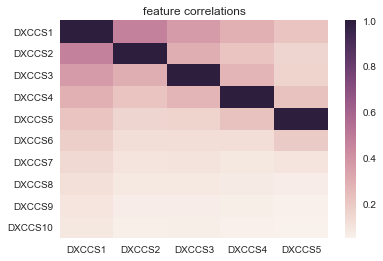

In [227]:
# print the heatmap of feature correlations
target = DXCCS_columns[:5]
source = DXCCS_columns[:10]
PRDAY_columns_correlation = correlation_analysis(target, source)

## PRCCS_columns

In [225]:
sub_prccs = df.loc[:,PRCCS_columns]
print('Listing PRCCS columns...')
print(PRCCS_columns)
print('The shape of the subset is:',sub_prccs.shape)
# checking missing values
missing_prccs = checking_missing(sub_prccs,False)

Listing PRCCS columns...
['PRCCS1', 'PRCCS2', 'PRCCS3', 'PRCCS4', 'PRCCS5', 'PRCCS6', 'PRCCS7', 'PRCCS8', 'PRCCS9', 'PRCCS10', 'PRCCS11', 'PRCCS12', 'PRCCS13', 'PRCCS14', 'PRCCS15']
The shape of the subset is: (494932, 15)
The number of missing value for PRCCS1 is: 196207 , 39.64 %
The number of missing value for PRCCS2 is: 322883 , 65.24 %
The number of missing value for PRCCS3 is: 394778 , 79.76 %
The number of missing value for PRCCS4 is: 432450 , 87.38 %
The number of missing value for PRCCS5 is: 453259 , 91.58 %
The number of missing value for PRCCS6 is: 466793 , 94.31 %
The number of missing value for PRCCS7 is: 476734 , 96.32 %
The number of missing value for PRCCS8 is: 483075 , 97.60 %
The number of missing value for PRCCS9 is: 487261 , 98.45 %
The number of missing value for PRCCS10 is: 489548 , 98.91 %
The number of missing value for PRCCS11 is: 491072 , 99.22 %
The number of missing value for PRCCS12 is: 492177 , 99.44 %
The number of missing value for PRCCS13 is: 492850 , 9

In [233]:
sub_prccs.head(5)

,PRCCS1,PRCCS2,PRCCS3,PRCCS4,PRCCS5,PRCCS6,PRCCS7,PRCCS8,PRCCS9,PRCCS10,PRCCS11,PRCCS12,PRCCS13,PRCCS14,PRCCS15
0,103.0,54.0,70.0,71.0,223.0,222.0,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,37.0,216.0,223.0,216.0,216.0,70.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,223.0,223.0,54.0,216.0,222.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,222.0,174.0,65.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,216.0,216.0,223.0,222.0,37.0,37.0,54.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
sub_prccs.describe()

,PRCCS1,PRCCS2,PRCCS3,PRCCS4,PRCCS5,PRCCS6,PRCCS7,PRCCS8,PRCCS9,PRCCS10,PRCCS11,PRCCS12,PRCCS13,PRCCS14,PRCCS15
count,298725.000000,172049.000000,100154.000000,62482.000000,41673.000000,28139.000000,18198.000000,11857.000000,7671.000000,5384.000000,3860.000000,2755.000000,2082.000000,1569.000000,1152.000000
mean,137.754949,139.183988,140.849612,146.648043,150.211384,153.949074,161.598362,173.311968,176.215226,176.389487,175.062953,175.192377,175.225744,172.491396,177.026910
std,65.375120,70.385670,73.751754,75.363490,77.543213,78.051593,77.055560,73.054444,71.752044,71.762015,72.897774,72.347518,72.257575,73.729546,70.742765
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000
25%,80.000000,70.000000,61.000000,61.000000,61.000000,61.000000,61.000000,99.000000,124.500000,142.000000,108.000000,108.000000,111.000000,98.000000,160.000000
50%,140.000000,140.000000,142.000000,161.000000,178.000000,191.000000,204.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
75%,203.000000,216.000000,219.000000,222.000000,223.000000,226.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,228.000000,228.000000
max,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000


/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


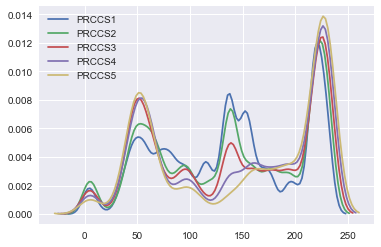

In [235]:
sns.kdeplot(df[PRCCS_columns[0]],label = 'PRCCS1')
sns.kdeplot(df[PRCCS_columns[1]],label = 'PRCCS2')
sns.kdeplot(df[PRCCS_columns[2]],label = 'PRCCS3')
sns.kdeplot(df[PRCCS_columns[3]],label = 'PRCCS4')
sns.kdeplot(df[PRCCS_columns[4]],label = 'PRCCS5')
plt.legend();

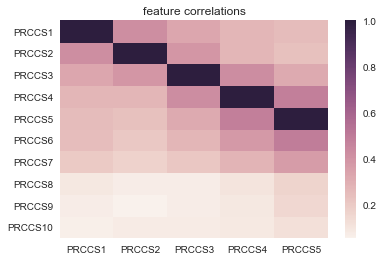

In [228]:
# print the heatmap of feature correlations
target = PRCCS_columns[:5]
source = PRCCS_columns[:10]
PRCCS_columns_correlation = correlation_analysis(target, source)

## CM_columns

In [192]:
sub_cm = df.loc[:,CM_columns]
print('Listing CM columns...')
print(CM_columns)
print('The shape of the subset is:',sub_cm.shape)
# checking missing values
missing_cm = checking_missing(sub_cm,False)

Listing CM columns...
['CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS']
The shape of the subset is: (494932, 29)
There is no missing value...


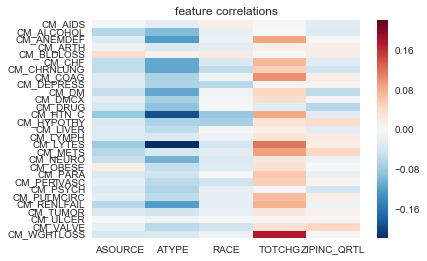

In [194]:
# print the heatmap of feature correlations
target = ['ASOURCE','ATYPE','RACE','TOTCHG','ZIPINC_QRTL']
source = CM_columns
CM_columns_correlation = correlation_analysis(target, source)